In [1]:
import pandas as pd
import numpy as np


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_2024 = pd.read_csv("main.csv")
df_2024

,Month,SKU,Description,Category,Supplier,Sales
0,1,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,80.0
1,1,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,1000.0
2,1,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,1000.0
3,1,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,2000.0
4,1,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,1000.0
...,...,...,...,...,...,...
150449,12,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.0
150450,12,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.0
150451,12,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0
150452,12,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.0


In [5]:

# Convert Month column to integers if not already
df_2024['Month'] = df_2024['Month'].astype(int)

# List to store new data
df_historical = []

# Years to generate
years = [2022, 2023]

# Function to generate historical data
def generate_historical_data(df, year):
    global df_historical
    np.random.seed(year)  # Seed to ensure replicability for each year
    
    for _, row in df.iterrows():
        original_months = df[df["SKU"] == row["SKU"]]["Month"].unique()  # Extract months for SKU
        
        all_months = np.arange(1, 13)  # All possible months (1-12)
        
        # Adjust probabilities dynamically
        p = np.array([0.6 if m in original_months else 0.4 for m in all_months])
        p = p / p.sum()  # Normalize probabilities so they sum to 1
        
        # Determine valid sample size
        min_months = max(1, len(original_months) - 2)  # At least 1 month
        max_months = min(12, len(original_months) + 3)  # At most 12 months
        
        # Randomly select sales months with weighted probability
        chosen_months = np.random.choice(
            all_months, 
            size=np.random.randint(min_months, max_months),  
            replace=False, 
            p=p  # Use normalized probabilities
        )
        
        for month in chosen_months:
            adjusted_sales = row["Sales"] * np.random.uniform(0.8, 1.2)  # Add slight randomness
            
            df_historical.append({
                "Year": year,
                "Month": month,
                "SKU": row["SKU"],
                "Description": row["Description"],
                "Category": row["Category"],
                "Supplier": row["Supplier"],
                "Sales": max(0, round(adjusted_sales, 2))  # Ensure no negative sales
            })

# Generate historical data for 2022-2023
for year in years:
    generate_historical_data(df_2024, year)

# Convert list to DataFrame
df_historical = pd.DataFrame(df_historical)

# Add the 2024 data to the final dataset
df_2024["Year"] = 2024  # Add the year column for 2024
df_final = pd.concat([df_historical, df_2024], ignore_index=True)

In [6]:
df_final

,Year,Month,SKU,Description,Category,Supplier,Sales
0,2022,7,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,95.28
1,2022,2,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,67.09
2,2022,1,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,87.81
3,2022,9,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.36
4,2022,11,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.56
...,...,...,...,...,...,...,...
2679507,2024,12,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.00
2679508,2024,12,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00
2679509,2024,12,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00
2679510,2024,12,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.00


In [10]:
df_final[df_final["SKU"]==99988 & df_fin

,Year,Month,SKU,Description,Category,Supplier,Sales
103923,2022,1,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,40554.13
103924,2022,3,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,46723.23
207681,2022,12,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,34490.58
207682,2022,11,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,39105.20
207683,2022,10,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,45123.83
314585,2022,8,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,0.00
314586,2022,12,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,0.00
314587,2022,9,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,0.00
314588,2022,6,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,0.00
314589,2022,5,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,0.00


In [11]:
def format_month_column(df):
    df['Month'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))  # Set day to 1
    df['Month'] = df['Month'].dt.strftime('%d/%m/%Y')  # Convert to "dd/mm/yyyy" format
    return df

# Apply to both datasets
df_historical = format_month_column(df_historical)
df_2024 = format_month_column(df_2024)

# Confirm change
print(df_historical[['Month']].head())
print(df_2024[['Month']].head())

        Month
0  01/07/2022
1  01/02/2022
2  01/01/2022
3  01/09/2022
4  01/11/2022
        Month
0  01/01/2024
1  01/01/2024
2  01/01/2024
3  01/01/2024
4  01/01/2024


In [13]:
df_final=format_month_column(df_final)

In [14]:
df_final

,Year,Month,SKU,Description,Category,Supplier,Sales
0,2022,01/07/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,95.28
1,2022,01/02/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,67.09
2,2022,01/01/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,87.81
3,2022,01/09/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.36
4,2022,01/11/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.56
...,...,...,...,...,...,...,...
2679507,2024,01/12/2024,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.00
2679508,2024,01/12/2024,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00
2679509,2024,01/12/2024,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00
2679510,2024,01/12/2024,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.00


In [17]:
del(df_final["Year"])

In [18]:
df_final

,Month,SKU,Description,Category,Supplier,Sales
0,01/07/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,95.28
1,01/02/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,67.09
2,01/01/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,87.81
3,01/09/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.36
4,01/11/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,73.56
...,...,...,...,...,...,...
2679507,01/12/2024,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.00
2679508,01/12/2024,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00
2679509,01/12/2024,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00
2679510,01/12/2024,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.00


In [22]:
df_final[df_final["SKU"]==99813]

,Month,SKU,Description,Category,Supplier,Sales
1265021,01/11/2022,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2025.19
1265022,01/10/2022,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2146.49
2529042,01/04/2023,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2134.88
2529043,01/01/2023,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,1698.13
2679508,01/12/2024,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00


In [23]:
import pandas as pd

# Assuming your dataset is loaded as df_historical
df_historical['Month'] = pd.to_datetime(df_historical['Month'], format="%d/%m/%Y")

# Extract the year from the 'Month' column
df_historical['Year'] = df_historical['Month'].dt.year

# Count the number of rows for each year
year_counts = df_historical['Year'].value_counts().sort_index()

# Display the result
print(year_counts)


Year
2022    1265039
2023    1264019
Name: count, dtype: int64


In [25]:
import pandas as pd

# Check if there are duplicate sales events per SKU per month
duplicates = df_historical.duplicated(subset=['Month', 'SKU'], keep=False)
num_duplicates = duplicates.sum()
print(f"Number of duplicate sales events per SKU per month: {num_duplicates}")

# Extract Year from Month
df_historical['Year'] = df_historical['Month'].dt.year

# Unique SKUs per year
unique_skus_per_year = df_historical.groupby('Year')['SKU'].nunique()
print("\nUnique SKUs per Year:")
print(unique_skus_per_year)

# Total rows per SKU per year
sku_count_per_year = df_historical.groupby('Year')['SKU'].count()
print("\nTotal Sales Events per Year:")
print(sku_count_per_year)

# Compute sales event per SKU ratio (for 2022 and 2023)
ratio_2022 = sku_count_per_year.get(2022, 0) / unique_skus_per_year.get(2022, 1)
ratio_2023 = sku_count_per_year.get(2023, 0) / unique_skus_per_year.get(2023, 1)

print("\nSales Events per SKU Ratio:")
print(f"2022: {ratio_2022:.2f}, 2023: {ratio_2023:.2f}")


Number of duplicate sales events per SKU per month: 2435419

Unique SKUs per Year:
Year
2022    26313
2023    26313
Name: SKU, dtype: int64

Total Sales Events per Year:
Year
2022    1265039
2023    1264019
Name: SKU, dtype: int64

Sales Events per SKU Ratio:
2022: 48.08, 2023: 48.04


In [28]:
# Extract Year from the 'Month' column
df_final["Year"] = pd.to_datetime(df_final["Month"]).dt.year  

# Now proceed with grouping
sales_event_counts = df_final.groupby(["Year", "Month", "SKU"]).size().reset_index(name="Sales Events")

# Display statistics to check if data distribution is realistic
print(sales_event_counts.describe())  


                Year            SKU   Sales Events
count  564092.000000  564092.000000  564092.000000
mean     2022.899912  174662.628428       4.750133
std         0.789626  136316.315382       4.130643
min      2022.000000     102.000000       1.000000
25%      2022.000000   52078.000000       1.000000
50%      2023.000000   88900.000000       3.000000
75%      2024.000000  323400.000000       9.000000
max      2024.000000  995692.000000      12.000000


In [30]:
# Count total sales events per year
total_sales_per_year = sales_event_counts.groupby("Year")["Sales Events"].sum()

# Count unique SKUs per year
unique_skus_per_year = sales_event_counts.groupby("Year")["SKU"].nunique()

# Compute average sales events per SKU
sales_event_ratio = total_sales_per_year / unique_skus_per_year

# Print the results to compare
print("Sales Event Ratio per SKU:")
print(sales_event_ratio)


Sales Event Ratio per SKU:
Year
2022    48.076578
2023    48.037814
2024     5.717858
dtype: float64


In [31]:
import numpy as np

# Define a scaling factor based on the 2024 ratio
scaling_factor_2022 = sales_event_ratio[2024] / sales_event_ratio[2022]
scaling_factor_2023 = sales_event_ratio[2024] / sales_event_ratio[2023]

# Function to randomly drop excess sales events
def reduce_sales_events(df, year, scaling_factor):
    if scaling_factor < 1:  # Only adjust if the data is over-represented
        df_year = df[df["Year"] == year].copy()
        
        # Randomly drop rows to match the expected ratio
        df_year = df_year.sample(frac=scaling_factor, random_state=42)
        
        return df_year
    else:
        return df[df["Year"] == year]  # Keep the same if scaling is fine

# Apply the function to adjust sales events
df_2022_adjusted = reduce_sales_events(df_final, 2022, scaling_factor_2022)
df_2023_adjusted = reduce_sales_events(df_final, 2023, scaling_factor_2023)
df_2024_adjusted = df_final[df_final["Year"] == 2024]  # Keep 2024 unchanged

# Combine the adjusted datasets
df_final_adjusted = pd.concat([df_2022_adjusted, df_2023_adjusted, df_2024_adjusted])

# Check new row counts
print("New row counts per year:")
print(df_final_adjusted["Year"].value_counts())


New row counts per year:
Year
2022    150454
2023    150454
2024    150454
Name: count, dtype: int64


In [33]:

# Define target multipliers for each year
target_multipliers = {2022: 0.9, 2023: 0.95}  # Adjust as needed

# Function to adjust sales event counts per year
def adjust_sales_events(df, year, target_multiplier):
    df_year = df[df["Year"] == 2024].copy()  # Use 2024 structure
    target_size = int(len(df_year) * target_multiplier)  # Compute new target size
    
    # Randomly sample rows to match the target size
    df_year_sampled = df_year.sample(n=target_size, random_state=42).copy()
    
    # Update the year column to the respective historical year
    df_year_sampled["Year"] = year
    
    return df_year_sampled

# Apply the function for 2022 and 2023
df_2022_adjusted = adjust_sales_events(df_final, 2022, target_multipliers[2022])
df_2023_adjusted = adjust_sales_events(df_final, 2023, target_multipliers[2023])
df_2024_adjusted = df_final[df_final["Year"] == 2024]  # Keep 2024 unchanged

# Combine adjusted datasets
df_final_adjusted = pd.concat([df_2022_adjusted, df_2023_adjusted, df_2024_adjusted])

# Check new row counts per year
print("New row counts per year:")
print(df_final_adjusted["Year"].value_counts())


New row counts per year:
Year
2024    150454
2023    142931
2022    135408
Name: count, dtype: int64


In [37]:
df_final_adjusted[df_final_adjusted["SKU"]==324166]

,Month,SKU,Description,Category,Supplier,Sales,Year
2570126,01/04/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1080.0,2022
2670504,01/12/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1140.0,2022
2557650,01/03/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,2000.0,2022
2619545,01/08/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1080.0,2022
2582753,01/05/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,12920.0,2022
2595192,01/06/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1320.0,2022
2631729,01/09/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,2000.0,2022
2570126,01/04/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1080.0,2023
2670504,01/12/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1140.0,2023
2557650,01/03/2024,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,2000.0,2023


In [40]:


# Ensure 'Month' is in datetime format
df_final_adjusted["Month"] = pd.to_datetime(df_final_adjusted["Month"], format="%d/%m/%Y")

# Update the Year in the 'Month' column using the 'Year' column
df_final_adjusted["Month"] = df_final_adjusted.apply(lambda row: row["Month"].replace(year=row["Year"]), axis=1)

# Verify changes
print(df_final_adjusted[["Month", "Year"]].sample(10))  # Check if the years now match


             Month  Year
2575189 2024-04-01  2024
2580168 2023-05-01  2023
2669021 2022-12-01  2022
2650199 2022-10-01  2022
2584270 2023-05-01  2023
2562961 2022-03-01  2022
2597888 2022-06-01  2022
2559201 2022-03-01  2022
2632433 2023-09-01  2023
2666145 2023-12-01  2023


In [41]:
df_final_adjusted

,Month,SKU,Description,Category,Supplier,Sales,Year
2570126,2022-04-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1080.0,2022
2531024,2022-01-01,239728,SAINT PREIGNAN CABERNET SAUVIGNON - 750ML,WINE,MADIDUS LLC,1000.0,2022
2531946,2022-01-01,304426,SEAGLASS RIES - 750ML,WINE,SUTTER HOME WINERY INC,9080.0,2022
2609289,2022-07-01,351684,VELVET MONSTER CABERNET - 750ML,WINE,PWSWN INC,1000.0,2022
2530934,2022-01-01,237144,CH HAUT-BATAILLEY PAUILLAC GRAND CRU CLASSE - ...,WINE,MONSIEUR TOUTON SELECTION,1000.0,2022
...,...,...,...,...,...,...,...
2679507,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.0,2024
2679508,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.0,2024
2679509,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0,2024
2679510,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.0,2024


In [46]:
# Function to introduce variability in sales while keeping seasonality
def adjust_historical_sales(df):
    df_adjusted = df.copy()
    
    # Only modify historical data (2022, 2023), leave 2024 unchanged
    historical_mask = df_adjusted["Year"] != 2024

    # Apply variations:
    df_adjusted.loc[historical_mask, "Sales"] = (
        df_adjusted.loc[historical_mask, "Sales"] *
        np.random.uniform(0.7, 1.3, size=len(df_adjusted[historical_mask]))  # Random 70%-130% variation
    ).round(2)  # Round to 2 decimals for realistic numbers

    # Ensure no negative sales values
    df_adjusted["Sales"] = df_adjusted["Sales"].clip(lower=0)
    
    return df_adjusted

# Apply function to modify historical sales
df_final_adjusted = adjust_historical_sales(df_final_adjusted)



In [47]:
df_final_adjusted

,Month,SKU,Description,Category,Supplier,Sales,Year
0,2022-01-01,14753,CAHORS GOULEYANT GEO VIGOUROUX - 750ML,WINE,BARON FRANCOIS LTD,15263.25,2022
1,2022-01-01,91758,BUSCH LT 2/12 CAN - 12OZ,BEER,ANHEUSER BUSCH INC,103252.81,2022
2,2022-01-01,145843,RUSTIC CANYON CHARD - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,1959.40,2022
3,2022-01-01,70990,PISA NUT LIQUEUR - 750ML,LIQUOR,LANTERNA DISTRIBUTORS INC,1468.71,2022
4,2022-01-01,235608,LA GRUPA MALBEC/CAB GR SEL - 750ML,WINE,MONSIEUR TOUTON SELECTION,939.08,2022
...,...,...,...,...,...,...,...
428788,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00,2024
428789,2024-12-01,99684,DANSK VIKING BLOOD MEAD - 750ML,WINE,LEGENDS LTD,17140.00,2024
428790,2024-12-01,97179,LINDEMANS FRAMBOISE LAMBIC 2/6NR - 12OZ,BEER,RELIABLE CHURCHILL LLLP,9620.00,2024
428791,2024-12-01,99694,PAULANER SALVATORE 4/6NR - 12OZ,BEER,REPUBLIC NATIONAL DISTRIBUTING CO,4000.00,2024


In [48]:
# Define seasonality scaling factors (assumption based on industry trends)
seasonality_factors = {
    1: 0.7,  # Lower demand in January (post-holiday)
    2: 0.75, # Slow recovery in February
    3: 0.9,  
    4: 1.0,  
    5: 1.1,  
    6: 1.3,  # Higher demand in summer
    7: 1.35, # Peak summer demand
    8: 1.3,  
    9: 1.1,  
    10: 1.0,  
    11: 1.4,  # Pre-holiday buildup
    12: 1.6   # Holiday peak (December)
}

# Function to adjust sales with seasonality
def generate_seasonal_historical_data(df, year):
    df_adjusted = df.copy()
    df_adjusted["Year"] = year  # Set historical year
    
    # Apply seasonal scaling
    df_adjusted["Sales"] = df_adjusted.apply(
        lambda row: row["Sales"] * seasonality_factors[row["Month"].month] * np.random.uniform(0.8, 1.2),
        axis=1
    )

    # Ensure no negative values
    df_adjusted["Sales"] = df_adjusted["Sales"].clip(lower=0).round(2)
    
    return df_adjusted

# Generate adjusted datasets for 2022 and 2023
df_2022 = generate_seasonal_historical_data(df_final[df_final["Year"] == 2024], 2022)
df_2023 = generate_seasonal_historical_data(df_final[df_final["Year"] == 2024], 2023)

# Combine all years into one final dataset
df_final_adjusted = pd.concat([df_2022, df_2023, df_final[df_final["Year"] == 2024]], ignore_index=True)

# Verify changes
print(df_final_adjusted.sample(10))  # Display random samples to check seasonality

            Month     SKU                                    Description  \
336941 2024-03-01   84600                           BOTA BOX MALBEC - 3L   
449445 2024-12-01   77997                      CROWN ROYAL MAPLE - 750ML   
294957 2024-12-01  397490                    SYCAMORE LANE CHARD - 750ML   
21019  2024-02-01   62317                       OMMEGANG BRUT IPA 6/4 NR   
129542 2024-11-01  348324                            WHEATLEY VODKA - 1L   
47356  2024-04-01   74084                      MONTELOBOZ MEZCAL - 750ML   
255462 2024-09-01  357383                     ANGELINE P/NOIR RS - 750ML   
326143 2024-03-01  172022                      WILLM CREMANT BDN - 750ML   
438515 2024-12-01   20084  GOLDEN ROAD WOLF AMONG WEEDS 16.OZ 6/4PKS CAN   
392845 2024-08-01  347520       BUSHMILL BLACK BUSH IRISH WHISKEY - 1LTR   

       Category                              Supplier     Sales  Year  
336941     WINE             DELICATO FAMILY VINEYARDS  86460.00  2024  
449445   LIQUOR    

In [50]:
df_final_adjusted[df_final_adjusted["SKU"]==324166]

,Month,SKU,Description,Category,Supplier,Sales,Year
4234,2024-01-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,3893.74,2022
16352,2024-02-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,5983.18,2022
28592,2024-03-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1865.08,2022
41068,2024-04-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1215.38,2022
53695,2024-05-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,14321.19,2022
66134,2024-06-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1694.30,2022
78257,2024-07-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,11742.17,2022
90487,2024-08-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1235.17,2022
102671,2024-09-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1774.67,2022
141446,2024-12-01,324166,CUNE RIOJA ROSADO - 750ML,WINE,ELITE WINES IMPORTS,1964.51,2022


In [51]:
# Function to update the year in the "Month" field
def update_year_in_month(df):
    df["Month"] = df.apply(lambda row: row["Month"].replace(year=row["Year"]), axis=1)
    return df

# Apply the fix to ensure "Month" has the correct year
df_final_adjusted = update_year_in_month(df_final_adjusted)



            Month     SKU                                   Description  \
160873 2023-01-01   76945                           FISH EYE CAB - 1.5L   
355638 2024-05-01  338984               ROCKTOWN SMALL CRAFT VODKA - 1L   
82268  2022-07-01   48923  MICHELOB ULTRA PRICKLY PEAR LIME INFUSION-NR   
64056  2022-06-01   24177            CRISPIN CIDER HONEY CRISP 12/22 OZ   
146980 2022-12-01   61778               PASCAL JOLIVET POU/FUME - 750ML   
156749 2023-01-01  351616                    MATAR SAUV BLANC/SEMILLION   
142109 2022-12-01  333043                         CH BEAUSEJOUR - 750ML   
237096 2023-08-01   11482                             MONKEY 47 - 375ML   
292948 2023-12-01  336085                 CASAL GARCIA VINHO VERDE - 1L   
19215  2022-02-01  415219                       SAN ELIAS CHARD - 750ML   

       Category                           Supplier      Sales  Year  
160873     WINE                     THE WINE GROUP   16680.74  2023  
355638   LIQUOR              BACCH

In [54]:
df_final_adjusted[df_final_adjusted["SKU"]==76945]

,Month,SKU,Description,Category,Supplier,Sales,Year
10419,2022-01-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,13677.02,2022
22590,2022-02-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,27607.60,2022
35059,2022-03-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,22394.34,2022
47601,2022-04-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,33400.63,2022
60338,2022-05-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,32346.74,2022
72460,2022-06-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,41339.18,2022
84733,2022-07-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,15357.45,2022
96910,2022-08-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,23239.06,2022
109143,2022-09-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,16110.74,2022
122000,2022-10-01,76945,FISH EYE CAB - 1.5L,WINE,THE WINE GROUP,20671.33,2022


In [55]:
# Load price_info.csv
price_info = pd.read_csv("price_info.csv")

price_info


,SKU,Category,Average Category Cost,Unit Price
0,10346,BEER,8,8.0
1,100009,WINE,15,20.0
2,100012,WINE,15,18.0
3,100023,WINE,15,16.0
4,100024,WINE,15,10.0
...,...,...,...,...
26308,97799,BEER,8,6.0
26309,99279,BEER,8,10.0
26310,99686,BEER,8,8.0
26311,99770,BEER,8,6.0


In [58]:
df_final_adjusted

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,46.59
1,2022-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,708.22
2,2022-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,652.98
3,2022-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,1591.88
4,2022-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,650.17
...,...,...,...,...,...,...
451357,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.00
451358,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00
451359,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00
451360,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.00


In [59]:
# Merge price_info to bring in Unit Price
df_final_adjusted = df_final_adjusted.merge(price_info[["SKU", "Unit Price"]], on="SKU", how="left")

# Check if there are any missing unit prices
missing_prices = df_final_adjusted[df_final_adjusted["Unit Price"].isna()]
print("Missing unit prices:\n", missing_prices)


Missing unit prices:
 Empty DataFrame
Columns: [Month, SKU, Description, Category, Supplier, Sales, Unit Price]
Index: []


In [60]:
# Ensure Sales is a multiple of Unit Price
df_final_adjusted["Sales"] = (df_final_adjusted["Sales"] / df_final_adjusted["Unit Price"]).round().astype(int) * df_final_adjusted["Unit Price"]


In [61]:
# Check that all sales values are multiples of unit price
check_sales = (df_final_adjusted["Sales"] % df_final_adjusted["Unit Price"]).unique()

# If this prints only [0], then all sales values are correctly adjusted
print("Sales multiple check:", check_sales)


Sales multiple check: [0.]


In [62]:
df_final_adjusted

,Month,SKU,Description,Category,Supplier,Sales,Unit Price
0,2022-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,40.0,20.0
1,2022-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,702.0,18.0
2,2022-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,656.0,16.0
3,2022-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,1590.0,10.0
4,2022-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,650.0,10.0
...,...,...,...,...,...,...,...
451357,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.0,6.0
451358,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.0,50.0
451359,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0,5.0
451360,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.0,10.0


In [ ]:
inventory_info = pd.read

In [44]:
# Sort the DataFrame by the 'Month' column in ascending order
df_final_adjusted = df_final_adjusted.sort_values(by="Month", ascending=True)

# Reset the index after sorting
df_final_adjusted = df_final_adjusted.reset_index(drop=True)

df_final_adjusted


,Month,SKU,Description,Category,Supplier,Sales,Year
0,2022-01-01,14753,CAHORS GOULEYANT GEO VIGOUROUX - 750ML,WINE,BARON FRANCOIS LTD,14070.0,2022
1,2022-01-01,91758,BUSCH LT 2/12 CAN - 12OZ,BEER,ANHEUSER BUSCH INC,101000.0,2022
2,2022-01-01,145843,RUSTIC CANYON CHARD - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,2000.0,2022
3,2022-01-01,70990,PISA NUT LIQUEUR - 750ML,LIQUOR,LANTERNA DISTRIBUTORS INC,1410.0,2022
4,2022-01-01,235608,LA GRUPA MALBEC/CAB GR SEL - 750ML,WINE,MONSIEUR TOUTON SELECTION,1000.0,2022
...,...,...,...,...,...,...,...
428788,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0,2024
428789,2024-12-01,99684,DANSK VIKING BLOOD MEAD - 750ML,WINE,LEGENDS LTD,17140.0,2024
428790,2024-12-01,97179,LINDEMANS FRAMBOISE LAMBIC 2/6NR - 12OZ,BEER,RELIABLE CHURCHILL LLLP,9620.0,2024
428791,2024-12-01,99694,PAULANER SALVATORE 4/6NR - 12OZ,BEER,REPUBLIC NATIONAL DISTRIBUTING CO,4000.0,2024


In [63]:
# Load existing inventory_info.csv
inventory_info = pd.read_csv("inventory_info.csv")

In [64]:
inventory_info

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,100007,WINE,1,0.0,NaN,NaN,False,NaN
1,100007,WINE,2,0.0,0.00,0.00,True,0.00
2,100007,WINE,3,0.0,0.00,0.00,True,0.00
3,100007,WINE,4,1000.0,1111.44,111.44,False,611.44
4,100007,WINE,5,1000.0,1272.90,272.90,False,772.90
...,...,...,...,...,...,...,...,...
315751,99990,BEER,8,2500.0,54688.10,52188.10,False,53438.10
315752,99990,BEER,9,0.0,52188.10,52188.10,False,52188.10
315753,99990,BEER,10,0.0,52188.10,52188.10,False,52188.10
315754,99990,BEER,11,0.0,52188.10,52188.10,False,52188.10


In [68]:
# Ensure Month is an integer
inventory_info["Month"] = inventory_info["Month"].astype(int)

# Manually assign the correct Year for each SKU
# We assume that if there is only 2024 data, we expand to 2022 and 2023 as well
inventory_info["Year"] = 2024  # Default year for existing data

# Convert Month and Year into "MM/YYYY" format
inventory_info["Month"] = inventory_info["Month"].apply(lambda x: f"{x:02d}/2024")

inventory_info


ValueError: invalid literal for int() with base 10: '01/2024'

In [69]:
inventory_info


,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,100007,WINE,01/2024,0.0,NaN,NaN,False,NaN
1,100007,WINE,02/2024,0.0,0.00,0.00,True,0.00
2,100007,WINE,03/2024,0.0,0.00,0.00,True,0.00
3,100007,WINE,04/2024,1000.0,1111.44,111.44,False,611.44
4,100007,WINE,05/2024,1000.0,1272.90,272.90,False,772.90
...,...,...,...,...,...,...,...,...
315751,99990,BEER,08/2024,2500.0,54688.10,52188.10,False,53438.10
315752,99990,BEER,09/2024,0.0,52188.10,52188.10,False,52188.10
315753,99990,BEER,10/2024,0.0,52188.10,52188.10,False,52188.10
315754,99990,BEER,11/2024,0.0,52188.10,52188.10,False,52188.10


In [70]:
# Get unique SKU and Category pairs
sku_category = inventory_info[["SKU", "Category"]].drop_duplicates()


In [71]:
sku_category

,SKU,Category
0,100007,WINE
12,100009,WINE
24,100011,WINE
36,100012,WINE
48,100022,WINE
...,...,...
315696,9989,BEER
315708,9997,BEER
315720,99970,BEER
315732,99988,KEGS


In [ ]:


# Expand inventory data for 2022 & 2023
years = [2022, 2023]
inventory_expanded = []

for year in years:
    for _, row in sku_category.iterrows():
        for month in range(1, 13):  # Loop through months (1-12)
            # Get the SKU
            sku = row["SKU"]
            category = row["Category"]

            # Simulate realistic beginning inventory (adjusted randomly)
            beginning_inventory = np.random.randint(300, 1500)  # Random stock levels

            # Get sales for the SKU in that month from df_final_adjusted
            sales = df_final_adjusted.loc[
                (df_final_adjusted["SKU"] == sku) & (df_final_adjusted["Month"].dt.year == year) & (df_final_adjusted["Month"].dt.month == month),
                "Sales"
            ].sum()

            # Ending inventory logic
            if beginning_inventory > sales:
                ending_inventory = beginning_inventory - sales
                stockout_flag = False
            else:
                ending_inventory = 0  # If sales exceed inventory, stockout
                stockout_flag = True

            # Compute average inventory
            avg_inventory = (beginning_inventory + ending_inventory) / 2

            # Append to new dataset
            inventory_expanded.append([sku, category, f"{month}/{year}", beginning_inventory, ending_inventory, stockout_flag, avg_inventory])

# Convert to DataFrame
df_inventory_expanded = pd.DataFrame(inventory_expanded, columns=["SKU", "Category", "Month", "Beginning Inventory", "Ending Inventory", "Stockout Flag", "Average Monthly Inventory"])


In [74]:
df_final_adjusted.dtypes

Month          datetime64[ns]
SKU                     int64
Description            object
Category               object
Supplier               object
Sales                 float64
Unit Price            float64
dtype: object

In [75]:
# Count the number of records per year
df_final_adjusted["Year"] = pd.to_datetime(df_final_adjusted["Month"], dayfirst=True).dt.year
print(df_final_adjusted["Year"].value_counts())


Year
2022    150454
2023    150454
2024    150454
Name: count, dtype: int64


In [76]:
# Compare total sales across years to check for inconsistencies
sales_per_year = df_final_adjusted.groupby("Year")["Sales"].sum()
print(sales_per_year)


Year
2022    3.091251e+09
2023    3.093130e+09
2024    2.648334e+09
Name: Sales, dtype: float64


In [77]:
# Identify duplicate SKU sales in the same month
duplicate_sales = df_final_adjusted.duplicated(subset=["SKU", "Month"], keep=False)
print(f"Total duplicate sales events: {duplicate_sales.sum()}")


Total duplicate sales events: 0


In [78]:
# Show random sample
print(df_final_adjusted.sample(10))


            Month     SKU                                  Description  \
231942 2023-07-01   42740                  GOATS DO ROAM WHITE - 750ML   
167804 2023-02-01  339671  BODEGAS RIOJANAS CANCHALES JOVEN 14 - 750ML   
261606 2023-10-01   12101                          ATLAS PONZI 1/6 KEG   
422195 2024-10-01   70781           RUSSELLS RESERVE SINGLE BARREL RYE   
124819 2022-11-01   22192          FLYING FISH GRAND CRU 4/6 NR - 12OZ   
172083 2023-02-01   70223          THREE OLIVES VODKA - BUBBLE - 750ML   
118665 2022-10-01  428088       SUIGEI TB JUNMAI DRUNKEN WHALE - 720ML   
120102 2022-10-01   60655                REKORDERLIG STRW LIME 1/6 KEG   
322068 2024-02-01   62991     BOLD ROCK SEASONAL GINGER TUMERIC 4/6 NR   
105532 2022-09-01   40803                     SELBACH RIES DRY - 750ML   

       Category                              Supplier    Sales  Unit Price  \
231942     WINE                 BACCHUS IMPORTERS LTD   3490.0        10.0   
167804     WINE        THE SP

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

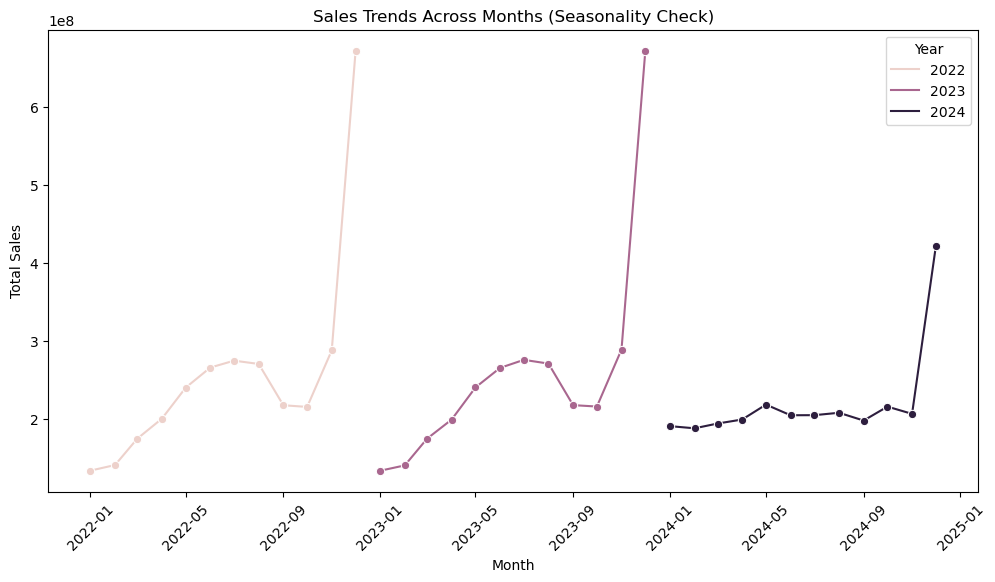

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Month' column to datetime if not already
df_final_adjusted["Month"] = pd.to_datetime(df_final_adjusted["Month"], dayfirst=True)

# Group sales by Month and Year
monthly_sales = df_final_adjusted.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month", y="Sales", hue="Year", marker="o")
plt.title("Sales Trends Across Months (Seasonality Check)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


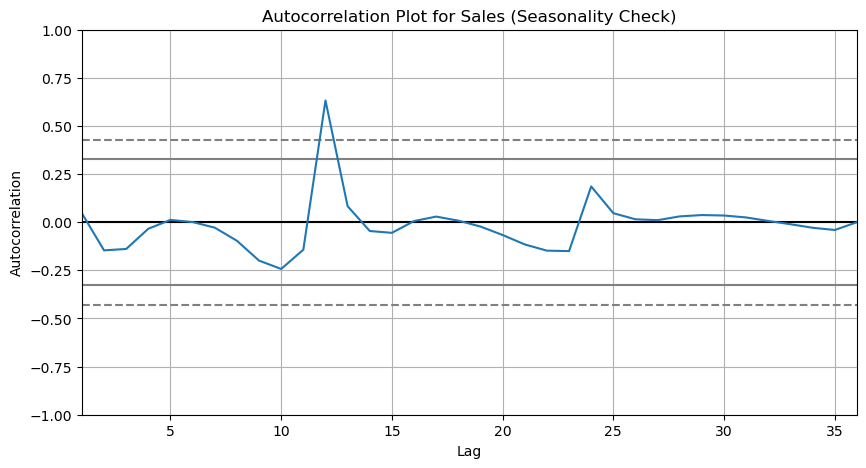

In [80]:
from pandas.plotting import autocorrelation_plot

# Aggregate monthly sales
monthly_sales_trend = df_final_adjusted.groupby("Month")["Sales"].sum()

# Plot autocorrelation
plt.figure(figsize=(10,5))
autocorrelation_plot(monthly_sales_trend)
plt.title("Autocorrelation Plot for Sales (Seasonality Check)")
plt.show()


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

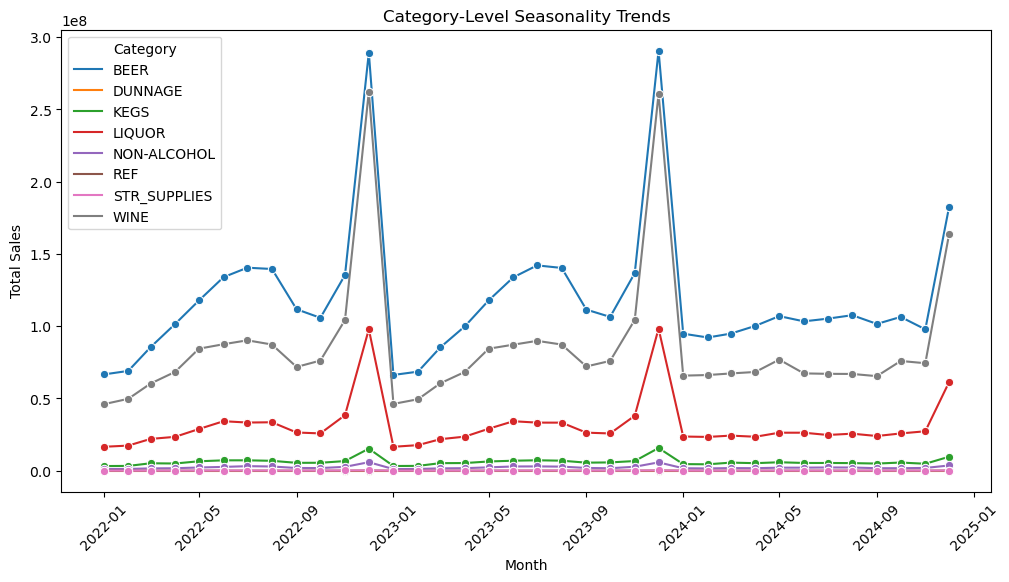

In [81]:
# Group by month & category
category_seasonality = df_final_adjusted.groupby(["Month", "Category"])["Sales"].sum().reset_index()

# Plot seasonality per category
plt.figure(figsize=(12,6))
sns.lineplot(data=category_seasonality, x="Month", y="Sales", hue="Category", marker="o")
plt.title("Category-Level Seasonality Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()
